In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
kcdata = pd.read_csv("C:/Users/Yousef Hanna/Desktop/github_gomycode/kc_house_data.csv")
kcdata

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
kcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
kcdata['date'] = pd.to_datetime(kcdata['date'])

In [5]:
kcdata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
kcdata['bathrooms'] = np.round(kcdata['bathrooms'])
kcdata['floors'] = np.round(kcdata['floors'])

In [7]:
kcdata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
kcdata.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

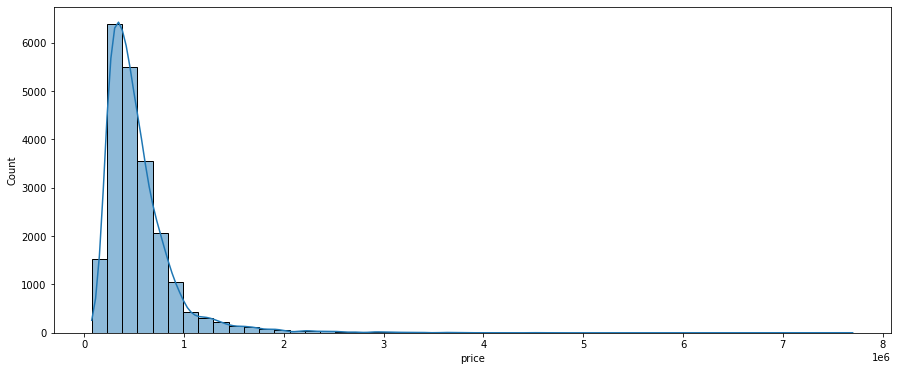

In [9]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(kcdata['price'],kde=True,bins=50)


<AxesSubplot:xlabel='yr_built', ylabel='price'>

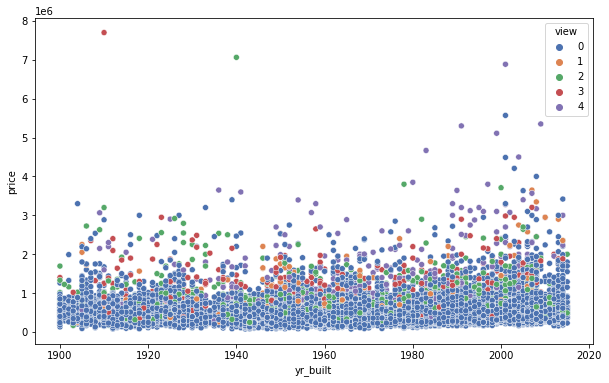

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='yr_built',y='price',data=kcdata,hue='view',palette = 'deep')

<AxesSubplot:xlabel='view', ylabel='count'>

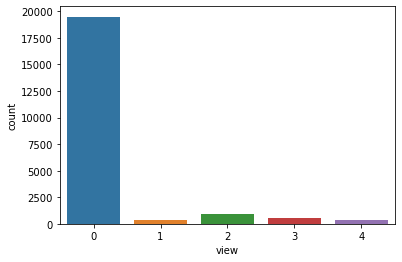

In [11]:
sns.countplot(x='view',data=kcdata)


<AxesSubplot:xlabel='waterfront', ylabel='count'>

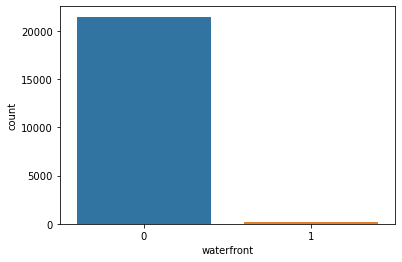

In [12]:
sns.countplot(x='waterfront',data=kcdata)

In [13]:
kc_viz = kcdata[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']]

In [14]:
kc_viz.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0,0,0,1955,0,1340,5650
1,538000.0,3,2.0,2570,7242,2.0,0,0,400,1951,1991,1690,7639
2,180000.0,2,1.0,770,10000,1.0,0,0,0,1933,0,2720,8062
3,604000.0,4,3.0,1960,5000,1.0,0,0,910,1965,0,1360,5000
4,510000.0,3,2.0,1680,8080,1.0,0,0,0,1987,0,1800,7503


In [ ]:
for i in kc_viz.columns:
    sns.barplot(kc_viz[i].value_counts().index,kc_viz[i].value_counts()).set_title(i)
    plt.show()

In [15]:
print('Mean of 1 room with view: ',kcdata.loc[(kcdata['waterfront']==1)&(kcdata['bedrooms']==1)]['price'].mean())
print('Mean of 1 room without view: ',kcdata.loc[(kcdata['waterfront']==0)&(kcdata['bedrooms']==1)]['price'].mean())
print('Mean of 2 rooms with view: ',kcdata.loc[(kcdata['waterfront']==1)&(kcdata['bedrooms']==2)]['price'].mean())
print('Mean of 2 rooms without view: ',kcdata.loc[(kcdata['waterfront']==0)&(kcdata['bedrooms']==2)]['price'].mean())
print('Mean of 3 rooms with view: ',kcdata.loc[(kcdata['waterfront']==1)&(kcdata['bedrooms']==3)]['price'].mean())
print('Mean of 3 rooms without view: ',kcdata.loc[(kcdata['waterfront']==0)&(kcdata['bedrooms']==3)]['price'].mean())
print('Mean of 4 rooms with view: ',kcdata.loc[(kcdata['waterfront']==1)&(kcdata['bedrooms']==4)]['price'].mean())
print('Mean of 4 rooms without view: ',kcdata.loc[(kcdata['waterfront']==0)&(kcdata['bedrooms']==4)]['price'].mean())

Mean of 1 room with view:  622680.0
Mean of 1 room without view:  309781.1030927835
Mean of 2 rooms with view:  918567.4838709678
Mean of 2 rooms without view:  395497.62183950166
Mean of 3 rooms with view:  1526424.21875
Mean of 3 rooms without view:  459279.99887295085
Mean of 4 rooms with view:  1928485.0
Mean of 4 rooms without view:  627859.9280912013


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

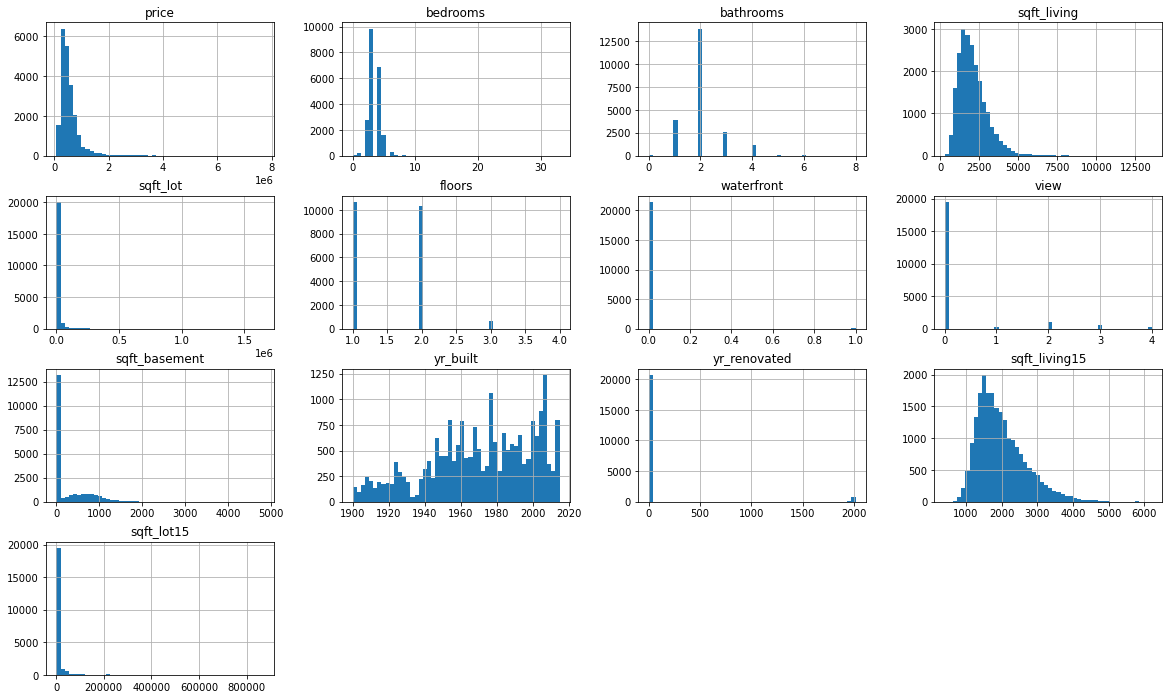

In [16]:
kc_viz.hist(bins=50, figsize=(20, 12))

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.518912     0.702035  0.089661  0.244906   
bedrooms       0.308350  1.000000   0.489609     0.576671  0.031703  0.177778   
bathrooms      0.518912  0.489609   1.000000     0.701784  0.089988  0.326466   
sqft_living    0.702035  0.576671   0.701784     1.000000  0.172826  0.321987   
sqft_lot       0.089661  0.031703   0.089988     0.172826  1.000000 -0.001947   
floors         0.244906  0.177778   0.326466     0.321987 -0.001947  1.000000   
waterfront     0.266369 -0.006582   0.065428     0.103818  0.021604  0.025839   
view           0.397293  0.079532   0.202647     0.284611  0.074710  0.027971   
sqft_basement  0.323816  0.303093   0.334909     0.435043  0.015286 -0.245659   
yr_built       0.054012  0.154178   0.377433     0.318049  0.053080  0.381396   
yr_renovated   0.126434  0.018841   0.069322     0.055363  0.007644  0.015424   
sqft_living15  0.585379  0.3

<AxesSubplot:>

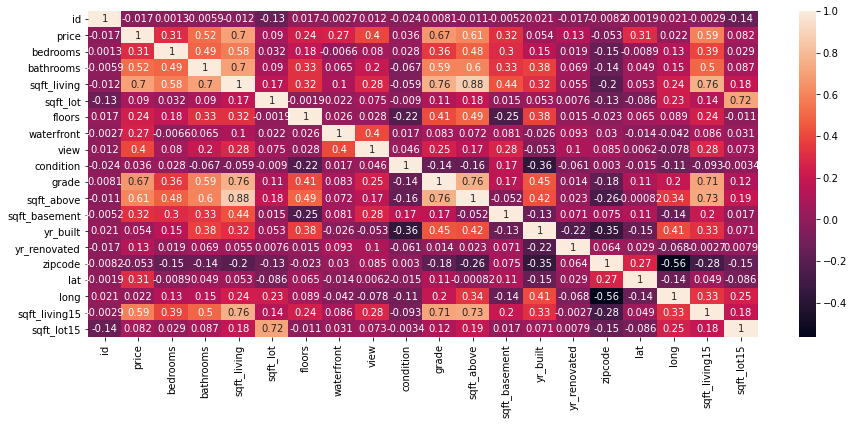

In [17]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
print(kc_viz.corr())
sns.heatmap(kcdata.corr(),annot=True)

In [18]:
kcdata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
kcdata.drop('id',inplace=True,axis=1)

In [20]:
kcdata.drop('date',inplace=True,axis=1)

In [21]:
kcdata.drop('zipcode',inplace=True,axis=1)

In [22]:
kcdata.drop('lat',inplace=True,axis=1)

In [23]:
kcdata.drop('long',inplace=True,axis=1)

In [24]:
kcdata.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

# The most important features to deal with:
   >- price  
   >- year   
   >- bedrooms
   >- floors
   >- waterfront
   >- view
   >- condition
   >- yr-built
   >- sqft_living15
##### features input for model: bedrooms, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view condition, grade, sqft_above, sqft_basement, sqft_living15, sqft_lot15
##### target to be used in training and used for prediction in test will be: the Price
if we to choose one input against the target(price) the most suitable one would be "sqft_living"

In [25]:
kc_feature = kcdata[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]
kc_target = kcdata[['price']]

In [26]:
kc_feature

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,2,1.0,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.0,1530,1131,3.0,0,0,3,8,1530,0,1530,1509
21609,4,2.0,2310,5813,2.0,0,0,3,8,2310,0,1830,7200
21610,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,1020,2007
21611,3,2.0,1600,2388,2.0,0,0,3,8,1600,0,1410,1287


# Multi-linear_regression

using the most important features as inputs and setting the price as the target
with test size 20%
MSE is quiet big value and is not good
R squared is 60% also not good enough

In [31]:
X_train, X_test, y_train, y_test = train_test_split(kc_feature, kc_target, test_size=0.20, random_state=50)

In [32]:
model=LinearRegression()   #build linear regression model
model.fit(X_train,y_train)  #fitting the training data
predicted=model.predict(X_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 58703630788.282005
R squared 0.6099799361398717


# linear_regression

MSE 63595386112.83998
R squared 0.5053104226540768


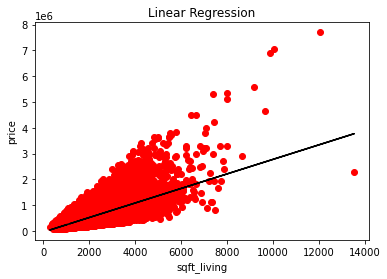

In [29]:
x=kc_feature[["sqft_living"]]
y=kc_target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

# Polynomial regression

In [30]:
x_train, x_test, y_train, y_test = train_test_split(kc_feature, kc_target, test_size=0.2, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  42728311841.3159
R squared:  0.660340537938447


# Polynimoal regression is the best for the data